# Project 3

In [1]:
import pandas as pd 
import numpy as np 
import csv  
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
import datetime
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import plot_roc_curve



import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline
import descartes

from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report

In [2]:
df = pd.read_csv("Data/merged_df.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558254 entries, 0 to 558253
Data columns (total 31 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               558254 non-null  int64  
 1   CRASH_RECORD_ID          558254 non-null  object 
 2   CRASH_DATE               558254 non-null  object 
 3   POSTED_SPEED_LIMIT       558254 non-null  int64  
 4   DEVICE_CONDITION         558254 non-null  object 
 5   WEATHER_CONDITION        558254 non-null  object 
 6   LIGHTING_CONDITION       558254 non-null  object 
 7   FIRST_CRASH_TYPE         558254 non-null  object 
 8   ROADWAY_SURFACE_COND     558254 non-null  object 
 9   ROAD_DEFECT              558254 non-null  object 
 10  CRASH_TYPE               558254 non-null  object 
 11  DAMAGE                   558254 non-null  object 
 12  PRIM_CONTRIBUTORY_CAUSE  558254 non-null  object 
 13  SEC_CONTRIBUTORY_CAUSE   558254 non-null  object 
 14  MOST

In [4]:
df['CRASH_DATE'] = df['CRASH_DATE'].map(lambda x: datetime.datetime.strptime(x[0:10], "%Y-%m-%d"))
df['CRASH_DATE']

0        2019-07-10
1        2019-07-10
2        2019-07-10
3        2019-07-10
4        2019-07-10
            ...    
558249   2019-06-19
558250   2019-06-19
558251   2019-06-19
558252   2019-06-19
558253   2019-07-05
Name: CRASH_DATE, Length: 558254, dtype: datetime64[ns]

In [5]:
df['CRASH_DATE'] = df['CRASH_DATE'].map(lambda x: datetime.datetime.strptime(x[0:10], "%Y-%m-%d"))
df['CRASH_DATE']

TypeError: 'Timestamp' object is not subscriptable

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Unnamed: 0                     0
CRASH_RECORD_ID                0
CRASH_DATE                     0
POSTED_SPEED_LIMIT             0
DEVICE_CONDITION               0
WEATHER_CONDITION              0
LIGHTING_CONDITION             0
FIRST_CRASH_TYPE               0
ROADWAY_SURFACE_COND           0
ROAD_DEFECT                    0
CRASH_TYPE                     0
DAMAGE                         0
PRIM_CONTRIBUTORY_CAUSE        0
SEC_CONTRIBUTORY_CAUSE         0
MOST_SEVERE_INJURY             0
CRASH_HOUR                     0
CRASH_DAY_OF_WEEK              0
CRASH_MONTH                    0
LATITUDE                    4208
LONGITUDE                   4208
PERSON_ID                      0
PERSON_TYPE                    0
SEX                         9431
SAFETY_EQUIPMENT            2207
AIRBAG_DEPLOYED            12308
EJECTION                    8345
VEHICLE_DEFECT             14890
VEHICLE_TYPE               14890
VEHICLE_USE                14890
MANEUVER                   14890
FIRST_CONT

In [8]:
df.duplicated().sum()

0

### future engineering

In [9]:
df['MOST_SEVERE_INJURY'] = df['MOST_SEVERE_INJURY'].map({'NO INDICATION OF INJURY': 'mild', 
                                                                         'REPORTED, NOT EVIDENT': 'mild',
                                                                         'NONINCAPACITATING INJURY': 'medium',
                                                                         'INCAPACITATING INJURY': 'severe',
                                                                         'FATAL': 'severe'})
df['MOST_SEVERE_INJURY']

0         mild
1         mild
2         mild
3         mild
4         mild
          ... 
558249    mild
558250    mild
558251    mild
558252    mild
558253    mild
Name: MOST_SEVERE_INJURY, Length: 558254, dtype: object

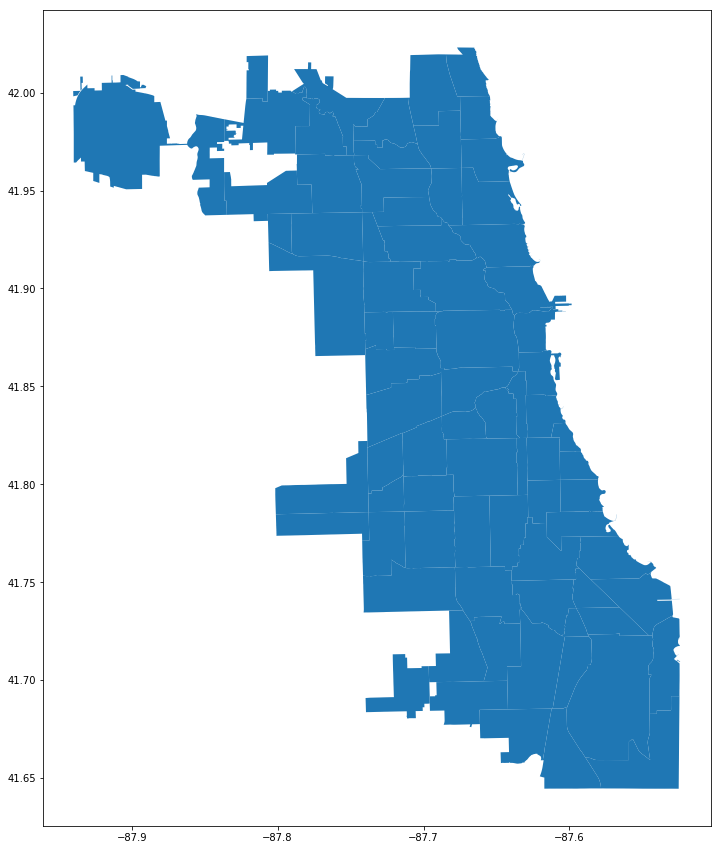

In [10]:
street_map = gpd.read_file('data/Boundaries - Community Areas (current).zip')
fig,ax = plt.subplots(figsize = (15,15))
street_map.plot(ax=ax)

In [11]:
crs = {'init': 'epsg:4326'}
geo = [Point(xy) for xy in zip( df["LONGITUDE"], df["LATITUDE"])]
geo[:3]

In [12]:
geo_df = gpd.GeoDataFrame(df, crs=crs,  geometry=geo )
geo_df = geo_df[geo_df['LONGITUDE'] != 0.0]
geo_df

/Users/raylinsoriano/anaconda3/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,Unnamed: 0,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,ROADWAY_SURFACE_COND,ROAD_DEFECT,...,SEX,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,MANEUVER,FIRST_CONTACT_POINT,geometry
0,0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10,35,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DRY,NO DEFECTS,...,M,USAGE UNKNOWN,NOT APPLICABLE,NONE,UNKNOWN,PASSENGER,PERSONAL,BACKING,REAR,POINT (-87.77329 41.91966)
1,1,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10,35,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DRY,NO DEFECTS,...,M,USAGE UNKNOWN,NOT APPLICABLE,NONE,UNKNOWN,PASSENGER,PERSONAL,TURNING RIGHT,FRONT,POINT (-87.77329 41.91966)
2,2,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10,35,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DRY,NO DEFECTS,...,M,USAGE UNKNOWN,NOT APPLICABLE,NONE,UNKNOWN,PASSENGER,PERSONAL,BACKING,REAR,POINT (-87.77329 41.91966)
3,3,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10,35,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DRY,NO DEFECTS,...,M,USAGE UNKNOWN,NOT APPLICABLE,NONE,UNKNOWN,PASSENGER,PERSONAL,TURNING RIGHT,FRONT,POINT (-87.77329 41.91966)
4,4,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10,35,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DRY,NO DEFECTS,...,M,USAGE UNKNOWN,NOT APPLICABLE,NONE,UNKNOWN,PASSENGER,PERSONAL,BACKING,REAR,POINT (-87.77329 41.91966)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558249,2528207,ffff27f5ef6d4465bf2e6da46c1d07ac6f017c6ca1f477...,2019-06-19,25,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",TURNING,WET,NO DEFECTS,...,M,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NONE,UNKNOWN,PICKUP,UNKNOWN/NA,TURNING RIGHT,REAR-LEFT,POINT (-87.70523 41.85817)
558250,2528208,ffff27f5ef6d4465bf2e6da46c1d07ac6f017c6ca1f477...,2019-06-19,25,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",TURNING,WET,NO DEFECTS,...,M,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NONE,UNKNOWN,UNKNOWN/NA,PERSONAL,TURNING LEFT,SIDE-RIGHT,POINT (-87.70523 41.85817)
558251,2528209,ffff27f5ef6d4465bf2e6da46c1d07ac6f017c6ca1f477...,2019-06-19,25,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",TURNING,WET,NO DEFECTS,...,F,SAFETY BELT USED,DID NOT DEPLOY,NONE,UNKNOWN,PICKUP,UNKNOWN/NA,TURNING RIGHT,REAR-LEFT,POINT (-87.70523 41.85817)
558252,2528210,ffff27f5ef6d4465bf2e6da46c1d07ac6f017c6ca1f477...,2019-06-19,25,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",TURNING,WET,NO DEFECTS,...,F,SAFETY BELT USED,DID NOT DEPLOY,NONE,UNKNOWN,UNKNOWN/NA,PERSONAL,TURNING LEFT,SIDE-RIGHT,POINT (-87.70523 41.85817)


In [13]:
geo_df['MOST_SEVERE_INJURY'].value_counts()

mild      483948
medium     59576
severe     14692
Name: MOST_SEVERE_INJURY, dtype: int64

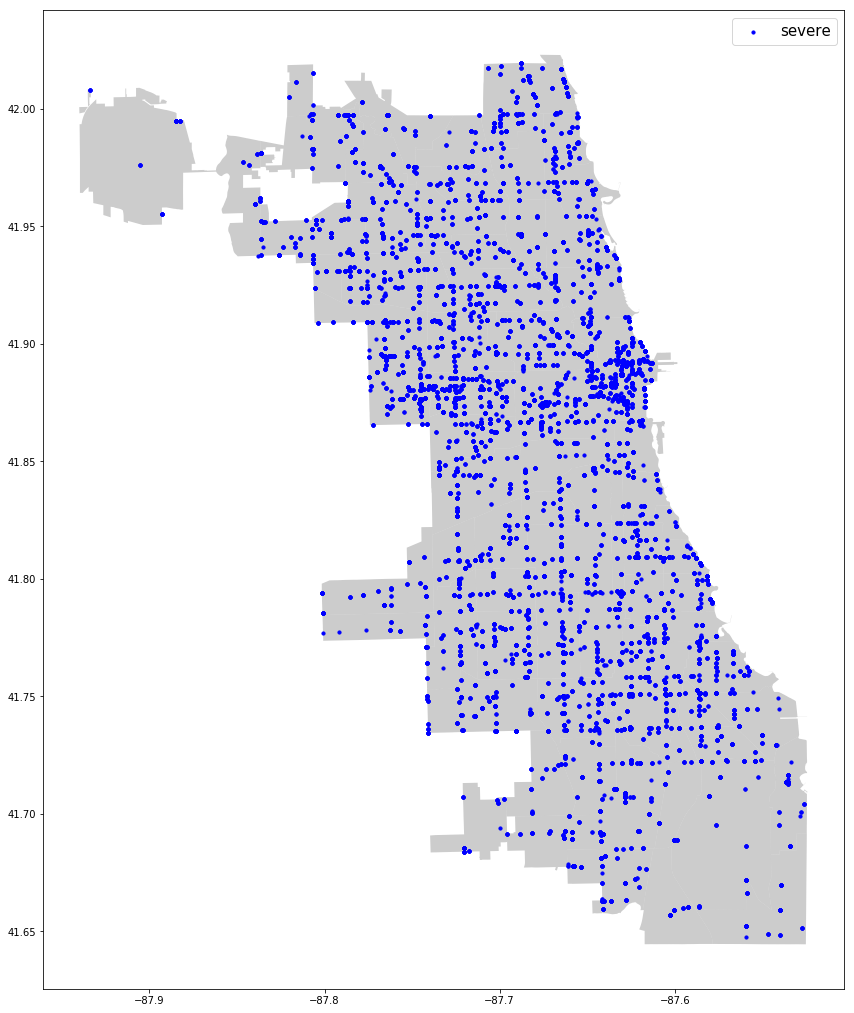

In [14]:
fig, ax = plt.subplots(figsize = (18,18))
street_map.plot(ax = ax, alpha = 0.4, color = 'grey')
geo_df[geo_df['MOST_SEVERE_INJURY'] == 'severe'].plot(ax = ax, 
                                                        markersize = 10, 
                                                        color = 'blue', 
                                                        marker = 'o', 
                                                        label = 'severe')


# geo_df[geo_df['MOST_SEVERE_INJURY'] == 'medium risk'].plot(ax = ax, 
#                                                         markersize = 10, 
#                                                         color = 'red', 
#                                                         marker = 'o', 
#                                                         label = 'medium')

plt.legend(prop = {'size':15})

In [15]:
step  = 0.01
to_bin = lambda x: np.floor(x / step ) * step 
geo_df["latbin"] = geo_df['LATITUDE'].map(to_bin)
geo_df["latbin"]
geo_df["lonbin"] = geo_df['LONGITUDE'].map(to_bin)
geo_df

,Unnamed: 0,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,ROADWAY_SURFACE_COND,ROAD_DEFECT,...,AIRBAG_DEPLOYED,EJECTION,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,MANEUVER,FIRST_CONTACT_POINT,geometry,latbin,lonbin
0,0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10,35,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DRY,NO DEFECTS,...,NOT APPLICABLE,NONE,UNKNOWN,PASSENGER,PERSONAL,BACKING,REAR,POINT (-87.77329 41.91966),41.91,-87.78
1,1,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10,35,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DRY,NO DEFECTS,...,NOT APPLICABLE,NONE,UNKNOWN,PASSENGER,PERSONAL,TURNING RIGHT,FRONT,POINT (-87.77329 41.91966),41.91,-87.78
2,2,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10,35,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DRY,NO DEFECTS,...,NOT APPLICABLE,NONE,UNKNOWN,PASSENGER,PERSONAL,BACKING,REAR,POINT (-87.77329 41.91966),41.91,-87.78
3,3,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10,35,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DRY,NO DEFECTS,...,NOT APPLICABLE,NONE,UNKNOWN,PASSENGER,PERSONAL,TURNING RIGHT,FRONT,POINT (-87.77329 41.91966),41.91,-87.78
4,4,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10,35,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DRY,NO DEFECTS,...,NOT APPLICABLE,NONE,UNKNOWN,PASSENGER,PERSONAL,BACKING,REAR,POINT (-87.77329 41.91966),41.91,-87.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558249,2528207,ffff27f5ef6d4465bf2e6da46c1d07ac6f017c6ca1f477...,2019-06-19,25,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",TURNING,WET,NO DEFECTS,...,DEPLOYMENT UNKNOWN,NONE,UNKNOWN,PICKUP,UNKNOWN/NA,TURNING RIGHT,REAR-LEFT,POINT (-87.70523 41.85817),41.85,-87.71
558250,2528208,ffff27f5ef6d4465bf2e6da46c1d07ac6f017c6ca1f477...,2019-06-19,25,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",TURNING,WET,NO DEFECTS,...,DEPLOYMENT UNKNOWN,NONE,UNKNOWN,UNKNOWN/NA,PERSONAL,TURNING LEFT,SIDE-RIGHT,POINT (-87.70523 41.85817),41.85,-87.71
558251,2528209,ffff27f5ef6d4465bf2e6da46c1d07ac6f017c6ca1f477...,2019-06-19,25,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",TURNING,WET,NO DEFECTS,...,DID NOT DEPLOY,NONE,UNKNOWN,PICKUP,UNKNOWN/NA,TURNING RIGHT,REAR-LEFT,POINT (-87.70523 41.85817),41.85,-87.71
558252,2528210,ffff27f5ef6d4465bf2e6da46c1d07ac6f017c6ca1f477...,2019-06-19,25,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",TURNING,WET,NO DEFECTS,...,DID NOT DEPLOY,NONE,UNKNOWN,UNKNOWN/NA,PERSONAL,TURNING LEFT,SIDE-RIGHT,POINT (-87.70523 41.85817),41.85,-87.71


/Users/raylinsoriano/anaconda3/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
No handles with labels found to put in legend.


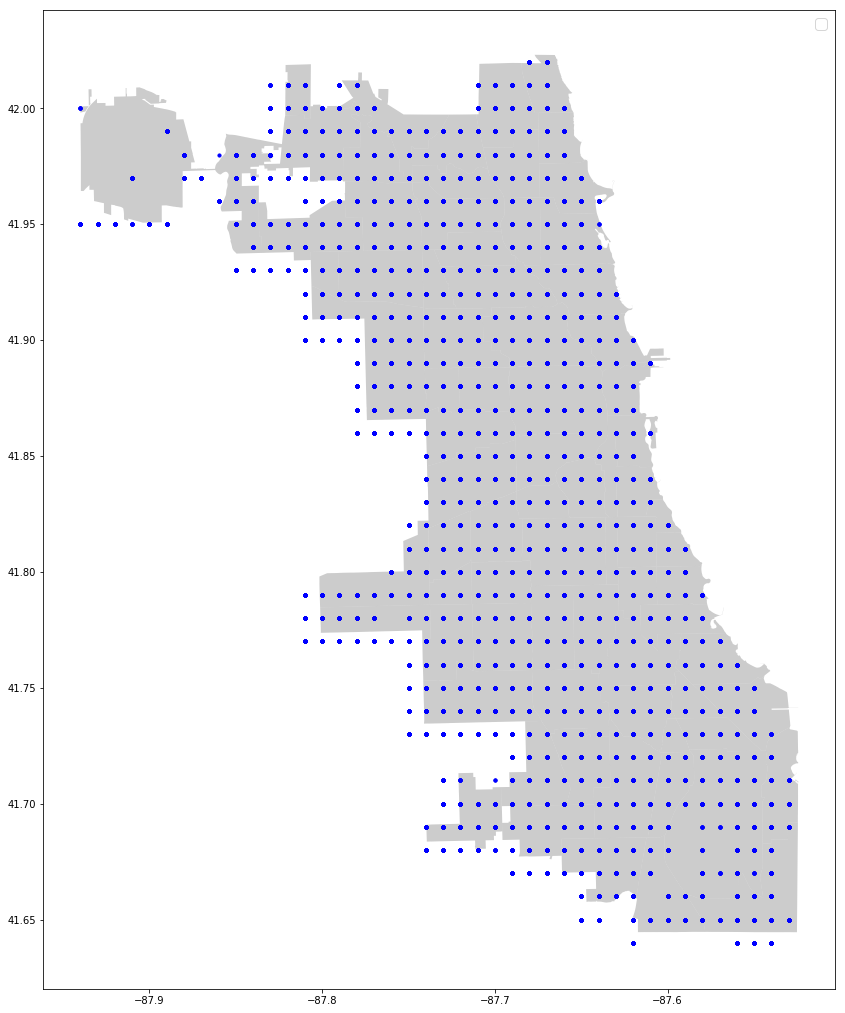

In [16]:
geo_bin = [Point(xy) for xy in zip( geo_df["lonbin"], geo_df["latbin"])]
geo_df_bin = gpd.GeoDataFrame(geo_df, crs=crs,  geometry=geo_bin )

fig, ax = plt.subplots(figsize = (18,18))
street_map.plot(ax = ax, alpha = 0.4, color = 'grey')
geo_df.plot(ax = ax, markersize = 10, color = 'blue', marker = 'o')


plt.legend(prop = {'size':15})

In [17]:
geo_bin = pd.DataFrame(geo_df[["lonbin","latbin"]].value_counts())
geo_bin.reset_index(inplace=True)
geo_bin['accident_count'] = geo_bin[0] 
geo_bin['accident_prob'] = 100*(geo_bin['accident_count']/geo_bin['accident_count'].sum())
print(geo_bin['accident_count'].quantile(.8) )     
print(geo_bin['accident_count'].quantile(.6) )     
print(geo_bin['accident_count'].quantile(.4) )     
print(geo_bin['accident_count'].quantile(.2) )


1259.0
838.0
484.0
170.0


In [18]:
def label_zones(accident_count):
    if accident_count > 1229.0:
        return 5
    if accident_count < 1229.0 and accident_count > 816.0:
        return 4
    if accident_count < 816.0 and accident_count > 466.0:
        return 3
    if accident_count < 466.0 and accident_count > 167.0:
        return 2
    if accident_count < 167.0:
        return 1

In [19]:
geo_bin['accident_risk'] = geo_bin['accident_count'].map(lambda x: label_zones(x))

In [229]:
df = geo_df.merge(geo_bin, how = 'left', on = ['lonbin','latbin'])
df.drop(df.columns[np.r_[0,34]], axis=1, inplace=True)

In [230]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 558216 entries, 0 to 558215
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   CRASH_RECORD_ID          558216 non-null  object        
 1   CRASH_DATE               558216 non-null  datetime64[ns]
 2   POSTED_SPEED_LIMIT       558216 non-null  int64         
 3   DEVICE_CONDITION         558216 non-null  object        
 4   WEATHER_CONDITION        558216 non-null  object        
 5   LIGHTING_CONDITION       558216 non-null  object        
 6   FIRST_CRASH_TYPE         558216 non-null  object        
 7   ROADWAY_SURFACE_COND     558216 non-null  object        
 8   ROAD_DEFECT              558216 non-null  object        
 9   CRASH_TYPE               558216 non-null  object        
 10  DAMAGE                   558216 non-null  object        
 11  PRIM_CONTRIBUTORY_CAUSE  558216 non-null  object        
 12  SEC_CONT

## Train Test Split

In [231]:
X =  df.drop(["MOST_SEVERE_INJURY","CRASH_RECORD_ID", "CRASH_DATE",'PERSON_ID','LATITUDE','LONGITUDE','geometry','latbin',
             'lonbin',"accident_prob",'DAMAGE','PRIM_CONTRIBUTORY_CAUSE','SEC_CONTRIBUTORY_CAUSE','SEX','SAFETY_EQUIPMENT',
             'EJECTION','VEHICLE_DEFECT', 'VEHICLE_TYPE', 'VEHICLE_USE','MANEUVER','FIRST_CONTACT_POINT', 'PERSON_TYPE','DEVICE_CONDITION'
             ,'WEATHER_CONDITION', 'LIGHTING_CONDITION'], axis=1)

df['MOST_SEVERE_INJURY'] = df['MOST_SEVERE_INJURY'].map({'mild': 0, 
                                                         'medium': 1,
                                                         'severe': 2})
y = df['MOST_SEVERE_INJURY']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .3, random_state = 42, stratify=y)

In [232]:
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)

/Users/raylinsoriano/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [233]:
X_train.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 390751 entries, 370426 to 320332
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   POSTED_SPEED_LIMIT    390751 non-null  int64  
 1   FIRST_CRASH_TYPE      390751 non-null  object 
 2   ROADWAY_SURFACE_COND  390751 non-null  object 
 3   ROAD_DEFECT           390751 non-null  object 
 4   CRASH_TYPE            390751 non-null  object 
 5   CRASH_HOUR            390751 non-null  int64  
 6   CRASH_DAY_OF_WEEK     390751 non-null  int64  
 7   CRASH_MONTH           390751 non-null  int64  
 8   AIRBAG_DEPLOYED       382117 non-null  object 
 9   accident_count        387852 non-null  float64
 10  accident_risk         387054 non-null  float64
dtypes: float64(2), int64(4), object(5)
memory usage: 35.8+ MB


In [234]:
X_train['AIRBAG_DEPLOYED'].fillna('DEPLOYMENT UNKNOWN', inplace=True)
X_train['accident_risk'].fillna(4, inplace=True)
X_train['accident_count'].fillna(X_train['accident_count'].mean(), inplace=True)

/Users/raylinsoriano/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [353]:
X_test['AIRBAG_DEPLOYED'].fillna('DEPLOYMENT UNKNOWN', inplace=True)
X_test['accident_risk'].fillna(4, inplace=True)
X_test['accident_count'].fillna(X_test['accident_count'].mean(), inplace=True)

/Users/raylinsoriano/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [235]:
X_train.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 390751 entries, 370426 to 320332
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   POSTED_SPEED_LIMIT    390751 non-null  int64  
 1   FIRST_CRASH_TYPE      390751 non-null  object 
 2   ROADWAY_SURFACE_COND  390751 non-null  object 
 3   ROAD_DEFECT           390751 non-null  object 
 4   CRASH_TYPE            390751 non-null  object 
 5   CRASH_HOUR            390751 non-null  int64  
 6   CRASH_DAY_OF_WEEK     390751 non-null  int64  
 7   CRASH_MONTH           390751 non-null  int64  
 8   AIRBAG_DEPLOYED       390751 non-null  object 
 9   accident_count        390751 non-null  float64
 10  accident_risk         390751 non-null  float64
dtypes: float64(2), int64(4), object(5)
memory usage: 35.8+ MB


## Smote

In [236]:
import imblearn

### First model

In [237]:
from sklearn.model_selection import cross_validate
dummy_model = DummyClassifier(strategy="most_frequent")
dummy_model.fit(X_train, y_train)
dummy_model.predict(X_train)[:50]
cv_results = cross_validate(dummy_model, X_train, y_train, return_train_score=True)

print('Mean Train Score: {}'.format(cv_results['train_score'].mean()))

Mean Train Score: 0.8669561946108768


#### one hot encoding

In [380]:
categoricals = [
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT',  
        'AIRBAG_DEPLOYED', 'FIRST_CRASH_TYPE']

train_dummies = X_train[categoricals]
test_dummies = X_test[categoricals]

# Create OneHotEncoder object to create dummies
ohe = OneHotEncoder(handle_unknown='ignore')

# Transform the dataset into dummies matrix
enc = ohe.fit(train_dummies)

train_dummies_trans = enc.transform(train_dummies)
test_dummies_trans = enc.transform(test_dummies)

# Dummies values in matrix form
train_data = train_dummies_trans.todense()
test_data = test_dummies_trans.todense()

# New dummy column names
names = ohe.get_feature_names(categoricals)

# Make them into Dataframe
train_dummies_trans_df = pd.DataFrame(train_data, columns=names,index = X_train.index)
test_dummies_trans_df = pd.DataFrame(test_data, columns=names, index= X_test.index)

In [381]:
X_train_num = pd.DataFrame(X_train_num, index = X_train.index)
X_train_num = X_train.select_dtypes(exclude='object') 
train_df = train_dummies_trans_df.merge(X_train_num, left_index = True , right_index=True)
train_df 

,ROADWAY_SURFACE_COND_DRY,ROADWAY_SURFACE_COND_ICE,ROADWAY_SURFACE_COND_OTHER,"ROADWAY_SURFACE_COND_SAND, MUD, DIRT",ROADWAY_SURFACE_COND_SNOW OR SLUSH,ROADWAY_SURFACE_COND_UNKNOWN,ROADWAY_SURFACE_COND_WET,ROAD_DEFECT_DEBRIS ON ROADWAY,ROAD_DEFECT_NO DEFECTS,ROAD_DEFECT_OTHER,...,FIRST_CRASH_TYPE_SIDESWIPE OPPOSITE DIRECTION,FIRST_CRASH_TYPE_SIDESWIPE SAME DIRECTION,FIRST_CRASH_TYPE_TRAIN,FIRST_CRASH_TYPE_TURNING,POSTED_SPEED_LIMIT,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,accident_count,accident_risk
370426,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,30,15,3,11,802.0,3.0
323852,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,30,10,1,3,1865.0,5.0
355672,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,10,15,7,4,6710.0,5.0
230910,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,30,17,6,10,1493.0,5.0
128955,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,25,2,2,11,1640.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427108,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,30,8,6,2,765.0,3.0
198573,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,10,13,6,3,2161.0,5.0
384736,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,10,11,5,5,1645.0,5.0
153650,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,30,12,4,4,991.0,4.0


In [382]:
X_test_num = pd.DataFrame(X_test_num, index = X_test.index)
X_test_num = X_test.select_dtypes(exclude='object') 
test_df = test_dummies_trans_df.merge(X_test_num, left_index = True , right_index=True)
test_df 

,ROADWAY_SURFACE_COND_DRY,ROADWAY_SURFACE_COND_ICE,ROADWAY_SURFACE_COND_OTHER,"ROADWAY_SURFACE_COND_SAND, MUD, DIRT",ROADWAY_SURFACE_COND_SNOW OR SLUSH,ROADWAY_SURFACE_COND_UNKNOWN,ROADWAY_SURFACE_COND_WET,ROAD_DEFECT_DEBRIS ON ROADWAY,ROAD_DEFECT_NO DEFECTS,ROAD_DEFECT_OTHER,...,FIRST_CRASH_TYPE_SIDESWIPE OPPOSITE DIRECTION,FIRST_CRASH_TYPE_SIDESWIPE SAME DIRECTION,FIRST_CRASH_TYPE_TRAIN,FIRST_CRASH_TYPE_TURNING,POSTED_SPEED_LIMIT,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,accident_count,accident_risk
270508,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,35,10,5,2,2524.0,5.0
274025,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,30,11,3,9,676.0,3.0
93714,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,30,16,5,9,1257.0,5.0
163719,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,30,19,7,1,1902.0,5.0
520336,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,35,0,1,10,1761.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137672,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,30,0,7,8,1856.0,5.0
323967,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,30,3,1,8,7583.0,5.0
204535,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,20,16,3,1,1069.0,4.0
349401,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,40,0,7,8,1251.0,5.0


# SMOTE

In [240]:
from collections import Counter
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train_sm, y_train_sm = oversample.fit_resample(train_df, y_train)

# Testing Different Models

In [242]:
# first Logisitc 
X_train_baseline = train_df

model_1 = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=10000000)
model_1.fit(X_train_baseline,y_train)




KeyboardInterrupt: 

In [128]:
y_hat = model_1.predict(X_train_baseline)

In [138]:
acc = accuracy_score(y_train,y_hat)
macro_precision_score=precision_score(y_train, y_hat, average='macro')
micro_precision_score=precision_score(y_train, y_hat, average='micro')
macro_recall_score=recall_score(y_train, y_hat, average='macro')
micro_recall_score=recall_score(y_train, y_hat, average='micro')

print('Accuracy Score: {}'.format(acc))
print('Macro Precision Score: {}'.format(macro_precision_score))
print('Micro Precision Score: {}'.format(micro_precision_score))
print('Macro Recall Score: {}'.format(macro_recall_score))
print('Micro Recall Score: {}'.format(micro_recall_score))

cv_results = cross_validate(model_1, train_df, y_train, return_train_score=True)

print('Mean Test Score: {}'.format(cv_results['test_score'].mean()))
print('Mean Train Score: {}'.format(cv_results['train_score'].mean()))

/Users/raylinsoriano/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy Score: 0.8773362064332529
Macro Precision Score: 0.470881879237351
Micro Precision Score: 0.8773362064332529
Macro Recall Score: 0.41368803084821365
Micro Recall Score: 0.8773362064332529


KeyboardInterrupt: 

In [139]:
X_train_1 = train_df

model_2 = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=10000000, class_weight='balanced')
model_2.fit(X_train_1, y_train)


LogisticRegression(class_weight='balanced', max_iter=10000000,
                   multi_class='multinomial')

In [142]:
y_hat_1 = model_2.predict(X_train_1)

In [143]:
acc1 = accuracy_score(y_train,y_hat_1)
macro_precision_score1=precision_score(y_train, y_hat_1, average='macro')
micro_precision_score1=precision_score(y_train, y_hat_1, average='micro')
macro_recall_score1=recall_score(y_train, y_hat_1, average='macro')
micro_recall_score1=recall_score(y_train, y_hat_1, average='micro')

print('Accuracy Score: {}'.format(acc1))
print('Macro Precision Score: {}'.format(macro_precision_score1))
print('Micro Precision Score: {}'.format(micro_precision_score1))
print('Macro Recall Score: {}'.format(macro_recall_score1))
print('Micro Recall Score: {}'.format(micro_recall_score1))

cv_results1 = cross_validate(model_2, train_df, y_train, return_train_score=True)

print('Mean Test Score: {}'.format(cv_results1['test_score'].mean()))
print('Mean Train Score: {}'.format(cv_results1['train_score'].mean()))

Accuracy Score: 0.7426289376098846
Macro Precision Score: 0.4101736128888351
Micro Precision Score: 0.7426289376098846
Macro Recall Score: 0.504294858814955
Micro Recall Score: 0.7426289376098846


KeyboardInterrupt: 

In [144]:
X_train_2 = train_df

model_3 = LogisticRegression(multi_class='multinomial', solver='newton-cg',max_iter=10000000)
model_3.fit(X_train_2, y_train)


/Users/raylinsoriano/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/raylinsoriano/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/raylinsoriano/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


LogisticRegression(max_iter=10000000, multi_class='multinomial',
                   solver='newton-cg')

In [145]:
y_hat_2 = model_3.predict(X_train_2)

In [146]:
acc2 = accuracy_score(y_train,y_hat_2)
macro_precision_score2=precision_score(y_train, y_hat_2, average='macro')
micro_precision_score2=precision_score(y_train, y_hat_2, average='micro')
macro_recall_score2=recall_score(y_train, y_hat_2, average='macro')
micro_recall_score2=recall_score(y_train, y_hat_2, average='micro')

print('Accuracy Score: {}'.format(acc2))
print('Macro Precision Score: {}'.format(macro_precision_score2))
print('Micro Precision Score: {}'.format(micro_precision_score2))
print('Macro Recall Score: {}'.format(macro_recall_score2))
print('Micro Recall Score: {}'.format(micro_recall_score2))

cv_results2 = cross_validate(model_3, train_df, y_train, return_train_score=True)

print('Mean Test Score: {}'.format(cv_results2['test_score'].mean()))
print('Mean Train Score: {}'.format(cv_results2['train_score'].mean()))

Accuracy Score: 0.8772568720233601
Macro Precision Score: 0.47182697016480785
Micro Precision Score: 0.8772568720233601
Macro Recall Score: 0.41295662171345726
Micro Recall Score: 0.8772568720233601


KeyboardInterrupt: 

In [147]:
X_train_3 = train_df

model_4 = LogisticRegression(multi_class='multinomial', solver='saga',max_iter=10000000)
model_4.fit(X_train_3, y_train)


LogisticRegression(max_iter=10000000, multi_class='multinomial', solver='saga')

In [148]:
y_hat_3 = model_4.predict(X_train_3)

In [ ]:
acc3 = accuracy_score(y_train,y_hat_3)
macro_precision_score3=precision_score(y_train, y_hat_3, average='macro')
micro_precision_score3=precision_score(y_train, y_hat_3, average='micro')
macro_recall_score3=recall_score(y_train, y_hat_3, average='macro')
micro_recall_score3=recall_score(y_train, y_hat_3, average='micro')

print('Accuracy Score: {}'.format(acc3))
print('Macro Precision Score: {}'.format(macro_precision_score3))
print('Micro Precision Score: {}'.format(micro_precision_score3))
print('Macro Recall Score: {}'.format(macro_recall_score3))
print('Micro Recall Score: {}'.format(micro_recall_score3))

cv_results3 = cross_validate(model_4, train_df, y_train, return_train_score=True)

print('Mean Test Score: {}'.format(cv_results3['test_score'].mean()))
print('Mean Train Score: {}'.format(cv_results3['train_score'].mean()))

In [150]:
X_train_4 = train_df

model_5 = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=10000000, C= 0.1)
model_5.fit(X_train_4, y_train)


LogisticRegression(C=0.1, max_iter=10000000, multi_class='multinomial')

In [151]:
y_hat_4 = model_5.predict(X_train_4)

In [153]:
acc4 = accuracy_score(y_train,y_hat_4)
macro_precision_score4=precision_score(y_train, y_hat_4, average='macro')
micro_precision_score4=precision_score(y_train, y_hat_4, average='micro')
macro_recall_score4=recall_score(y_train, y_hat_4, average='macro')
micro_recall_score4=recall_score(y_train, y_hat_4, average='micro')

print('Accuracy Score: {}'.format(acc3))
print('Macro Precision Score: {}'.format(macro_precision_score4))
print('Micro Precision Score: {}'.format(micro_precision_score4))
print('Macro Recall Score: {}'.format(macro_recall_score4))
print('Micro Recall Score: {}'.format(micro_recall_score4))

cv_results4 = cross_validate(model_5, train_df, y_train, return_train_score=True)

print('Mean Test Score: {}'.format(cv_results4['test_score'].mean()))
print('Mean Train Score: {}'.format(cv_results4['train_score'].mean()))

/Users/raylinsoriano/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy Score: 0.868276728658404
Macro Precision Score: 0.47093173913576614
Micro Precision Score: 0.8774488101118103
Macro Recall Score: 0.41562377193583994
Micro Recall Score: 0.8774488101118103


KeyboardInterrupt: 

In [154]:
from sklearn.ensemble import RandomForestClassifier

In [157]:
X_train_5 = train_df

rf_model = RandomForestClassifier(max_depth=2, random_state=0)
rf_model.fit(X_train_5, y_train)


RandomForestClassifier(max_depth=2, random_state=0)

In [158]:
y_hat_5 = rf_model.predict(X_train_5)

In [165]:
acc5 = accuracy_score(y_train,y_hat_5)
macro_precision_score5=precision_score(y_train, y_hat_5, average='macro')
micro_precision_score5=precision_score(y_train, y_hat_5, average='micro')
macro_recall_score5=recall_score(y_train, y_hat_5, average='macro')
micro_recall_score5=recall_score(y_train, y_hat_5, average='micro')

print('Accuracy Score: {}'.format(acc5))
print('Macro Precision Score: {}'.format(macro_precision_score5))
print('Micro Precision Score: {}'.format(micro_precision_score5))
print('Macro Recall Score: {}'.format(macro_recall_score5))
print('Micro Recall Score: {}'.format(micro_recall_score5))

cv_results5 = cross_validate(rf_model, train_df, y_train, return_train_score=True)

print('Mean Test Score: {}'.format(cv_results5['test_score'].mean()))
print('Mean Train Score: {}'.format(cv_results5['train_score'].mean()))

/Users/raylinsoriano/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy Score: 0.8669561946098666
Macro Precision Score: 0.2889853982032889
Micro Precision Score: 0.8669561946098666
Macro Recall Score: 0.3333333333333333
Micro Recall Score: 0.8669561946098666


KeyboardInterrupt: 

In [166]:
from sklearn.linear_model import RidgeClassifier

In [ ]:
X_train_6 = train_df

rd_model = RidgeClassifier(max_iter=10000, class_weight='balanced', tol =.01, random_state=42)
rd_model.fit(X_train_6, y_train)


In [ ]:
y_hat_5 = rd_model.predict(X_train_6)

In [182]:
acc6 = accuracy_score(y_train,y_hat_6)
macro_precision_score6=precision_score(y_train, y_hat_6, average='macro')
micro_precision_score6=precision_score(y_train, y_hat_6, average='micro')
macro_recall_score6=recall_score(y_train, y_hat_6, average='macro')
micro_recall_score6=recall_score(y_train, y_hat_6, average='micro')

print('Accuracy Score: {}'.format(acc6))
print('Macro Precision Score: {}'.format(macro_precision_score6))
print('Micro Precision Score: {}'.format(micro_precision_score6))
print('Macro Recall Score: {}'.format(macro_recall_score6))
print('Micro Recall Score: {}'.format(micro_recall_score6))

cv_results6 = cross_validate(rd_model, train_df, y_train, return_train_score=True)

print('Mean Test Score: {}'.format(cv_results6['test_score'].mean()))
print('Mean Train Score: {}'.format(cv_results6['train_score'].mean()))

/Users/raylinsoriano/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy Score: 0.8669561946098666
Macro Precision Score: 0.2889853982032889
Micro Precision Score: 0.8669561946098666
Macro Recall Score: 0.3333333333333333
Micro Recall Score: 0.8669561946098666
Mean Test Score: 0.1950086739655116
Mean Train Score: 0.1950648656401596


In [188]:
X_train_7 = train_df

model_6 = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=10000000, C= .1)
model_6.fit(X_train_7,y_train)

LogisticRegression(C=0.1, max_iter=10000000, multi_class='multinomial')

In [189]:
y_hat_6 = model_6.predict(X_train_7)

In [191]:
acc7 = accuracy_score(y_train,y_hat_6)
macro_precision_score7=precision_score(y_train, y_hat_6, average='macro', )
micro_precision_score7=precision_score(y_train, y_hat_6, average='micro')
macro_recall_score7=recall_score(y_train, y_hat_6, average='macro')
micro_recall_score7=recall_score(y_train, y_hat_6, average='micro')

print('Accuracy Score: {}'.format(acc7))
print('Macro Precision Score: {}'.format(macro_precision_score7))
print('Micro Precision Score: {}'.format(micro_precision_score7))
print('Macro Recall Score: {}'.format(macro_recall_score7))
print('Micro Recall Score: {}'.format(micro_recall_score7))

cv_results7 = cross_validate(model_6, train_df, y_train, return_train_score=True)

print('Mean Test Score: {}'.format(cv_results7['test_score'].mean()))
print('Mean Train Score: {}'.format(cv_results7['train_score'].mean()))

/Users/raylinsoriano/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy Score: 0.8774488101118103
Macro Precision Score: 0.47093173913576614
Micro Precision Score: 0.8774488101118103
Macro Recall Score: 0.41562377193583994
Micro Recall Score: 0.8774488101118103


KeyboardInterrupt: 

In [200]:
X_train_8 = train_df

model_7 = RandomForestClassifier(class_weight='balanced')
model_7.fit(X_train_8, y_train)

RandomForestClassifier(class_weight='balanced')

In [203]:
y_hat_7 = model_6.predict(X_train_8)

In [204]:
acc8 = accuracy_score(y_train,y_hat_7)
macro_precision_score8=precision_score(y_train, y_hat_7, average='macro', )
micro_precision_score8=precision_score(y_train, y_hat_7, average='micro')
macro_recall_score8=recall_score(y_train, y_hat_7, average='macro')
micro_recall_score8=recall_score(y_train, y_hat_7, average='micro')

print('Accuracy Score: {}'.format(acc8))
print('Macro Precision Score: {}'.format(macro_precision_score8))
print('Micro Precision Score: {}'.format(micro_precision_score8))
print('Macro Recall Score: {}'.format(macro_recall_score8))
print('Micro Recall Score: {}'.format(micro_recall_score8))

cv_results8 = cross_validate(model_7, train_df, y_train, return_train_score=True)

print('Mean Test Score: {}'.format(cv_results8['test_score'].mean()))
print('Mean Train Score: {}'.format(cv_results8['train_score'].mean()))

/Users/raylinsoriano/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy Score: 0.8774488101118103
Macro Precision Score: 0.47093173913576614
Micro Precision Score: 0.8774488101118103
Macro Recall Score: 0.41562377193583994
Micro Recall Score: 0.8774488101118103
Mean Test Score: 0.9801638399170699
Mean Train Score: 0.9994248255340074


In [248]:
model_8 = DecisionTreeClassifier()
model_8.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier()

In [249]:
y_hat_8 = model_8.predict(X_train_sm)

In [250]:
acc9 = accuracy_score(y_train_sm,y_hat_8)
macro_precision_score9=precision_score(y_train_sm, y_hat_8, average='macro', )
micro_precision_score9=precision_score(y_train_sm, y_hat_8, average='micro')
macro_recall_score9=recall_score(y_train_sm, y_hat_8, average='macro')
micro_recall_score9=recall_score(y_train_sm, y_hat_8, average='micro')

print('Accuracy Score: {}'.format(acc9))
print('Macro Precision Score: {}'.format(macro_precision_score9))
print('Micro Precision Score: {}'.format(micro_precision_score9))
print('Macro Recall Score: {}'.format(macro_recall_score9))
print('Micro Recall Score: {}'.format(micro_recall_score9))

cv_results9 = cross_validate(model_8, X_train_sm, y_train_sm, return_train_score=True)

print('Mean Test Score: {}'.format(cv_results8['test_score'].mean()))
print('Mean Train Score: {}'.format(cv_results8['train_score'].mean()))

Accuracy Score: 0.9997795909049761
Macro Precision Score: 0.9997796454013419
Micro Precision Score: 0.9997795909049761
Macro Recall Score: 0.9997795909049761
Micro Recall Score: 0.9997795909049761
Mean Test Score: 0.9801638399170699
Mean Train Score: 0.9994248255340074


# RandomRainforest Models

In [265]:
y_hat_9 = model_8.predict(X_train_sm)

In [266]:
acc10 = accuracy_score(y_train_sm,y_hat_9)
macro_precision_score10=precision_score(y_train_sm, y_hat_9, average='macro', )
micro_precision_score10=precision_score(y_train_sm, y_hat_9, average='micro')
macro_recall_score10=recall_score(y_train_sm, y_hat_9, average='macro')
micro_recall_score10=recall_score(y_train_sm, y_hat_9, average='micro')

print('Accuracy Score: {}'.format(acc10))
print('Macro Precision Score: {}'.format(macro_precision_score10))
print('Micro Precision Score: {}'.format(micro_precision_score10))
print('Macro Recall Score: {}'.format(macro_recall_score10))
print('Micro Recall Score: {}'.format(micro_recall_score10))

cv_results9 = cross_validate(model_9, X_train_sm, y_train_sm, return_train_score=True)

print('Mean Test Score: {}'.format(cv_results8['test_score'].mean()))
print('Mean Train Score: {}'.format(cv_results8['train_score'].mean()))

Accuracy Score: 0.9997795909049761
Macro Precision Score: 0.9997796454013419
Micro Precision Score: 0.9997795909049761
Macro Recall Score: 0.9997795909049761
Micro Recall Score: 0.9997795909049761
Mean Test Score: 0.9801638399170699
Mean Train Score: 0.9994248255340074


In [271]:
model_10 = RandomForestClassifier(max_depth=2)
model_10.fit(X_train_sm, y_train_sm)

RandomForestClassifier(max_depth=2)

In [272]:
y_hat_10 = model_10.predict(X_train_sm)

In [274]:
acc11 = accuracy_score(y_train_sm,y_hat_10)
macro_precision_score11=precision_score(y_train_sm, y_hat_10, average='macro', )
micro_precision_score11=precision_score(y_train_sm, y_hat_10, average='micro')
macro_recall_score11=recall_score(y_train_sm, y_hat_10, average='macro')
micro_recall_score11=recall_score(y_train_sm, y_hat_10, average='micro')

print('Accuracy Score: {}'.format(acc11))
print('Macro Precision Score: {}'.format(macro_precision_score11))
print('Micro Precision Score: {}'.format(micro_precision_score11))
print('Macro Recall Score: {}'.format(macro_recall_score11))
print('Micro Recall Score: {}'.format(micro_recall_score11))

cv_results10 = cross_validate(model_10, X_train_sm, y_train_sm, return_train_score=True)

print('Mean Test Score: {}'.format(cv_results10['test_score'].mean()))
print('Mean Train Score: {}'.format(cv_results10['train_score'].mean()))

Accuracy Score: 0.5139999134107127
Macro Precision Score: 0.5297848226903331
Micro Precision Score: 0.5139999134107127
Macro Recall Score: 0.5139999134107126
Micro Recall Score: 0.5139999134107127
Mean Test Score: 0.513196989858238
Mean Train Score: 0.5143511930893268


In [275]:
model_11 = RandomForestClassifier(max_depth=5)
model_11.fit(X_train_sm, y_train_sm)

RandomForestClassifier(max_depth=5)

In [276]:
y_hat_11 = model_11.predict(X_train_sm)

In [277]:
acc12 = accuracy_score(y_train_sm,y_hat_11)
macro_precision_score12=precision_score(y_train_sm, y_hat_11, average='macro', )
micro_precision_score12=precision_score(y_train_sm, y_hat_11, average='micro')
macro_recall_score12=recall_score(y_train_sm, y_hat_11, average='macro')
micro_recall_score12=recall_score(y_train_sm, y_hat_11, average='micro')

print('Accuracy Score: {}'.format(acc12))
print('Macro Precision Score: {}'.format(macro_precision_score12))
print('Micro Precision Score: {}'.format(micro_precision_score12))
print('Macro Recall Score: {}'.format(macro_recall_score12))
print('Micro Recall Score: {}'.format(micro_recall_score12))

cv_results11 = cross_validate(model_11, X_train_sm, y_train_sm, return_train_score=True)

print('Mean Test Score: {}'.format(cv_results11['test_score'].mean()))
print('Mean Train Score: {}'.format(cv_results11['train_score'].mean()))

Accuracy Score: 0.5509863307002318
Macro Precision Score: 0.5525591295426159
Micro Precision Score: 0.5509863307002318
Macro Recall Score: 0.5509863307002317
Micro Recall Score: 0.5509863307002318
Mean Test Score: 0.5507669129842687
Mean Train Score: 0.5536624825613654


In [278]:
model_12 = RandomForestClassifier(max_depth=10)
model_12.fit(X_train_sm, y_train_sm)

RandomForestClassifier(max_depth=10)

In [279]:
y_hat_12 = model_12.predict(X_train_sm)

In [280]:
acc13 = accuracy_score(y_train_sm,y_hat_12)
macro_precision_score13=precision_score(y_train_sm, y_hat_12, average='macro', )
micro_precision_score13=precision_score(y_train_sm, y_hat_12, average='micro')
macro_recall_score13=recall_score(y_train_sm, y_hat_12, average='macro')
micro_recall_score13=recall_score(y_train_sm, y_hat_12, average='micro')

print('Accuracy Score: {}'.format(acc13))
print('Macro Precision Score: {}'.format(macro_precision_score13))
print('Micro Precision Score: {}'.format(micro_precision_score13))
print('Macro Recall Score: {}'.format(macro_recall_score13))
print('Micro Recall Score: {}'.format(micro_recall_score13))

cv_results12 = cross_validate(model_12, X_train_sm, y_train_sm, return_train_score=True)

print('Mean Test Score: {}'.format(cv_results12['test_score'].mean()))
print('Mean Train Score: {}'.format(cv_results12['train_score'].mean()))

Accuracy Score: 0.6425003837479779
Macro Precision Score: 0.6734604391062421
Micro Precision Score: 0.6425003837479779
Macro Recall Score: 0.6425003837479779
Micro Recall Score: 0.6425003837479779
Mean Test Score: 0.6395711321915882
Mean Train Score: 0.643877942555793


In [284]:
model_13 = RandomForestClassifier(max_depth=20)
model_13.fit(X_train_sm, y_train_sm)

RandomForestClassifier(max_depth=20)

In [285]:
y_hat_13 = model_13.predict(X_train_sm)

In [286]:
acc14 = accuracy_score(y_train_sm,y_hat_13)
macro_precision_score14=precision_score(y_train_sm, y_hat_13, average='macro', )
micro_precision_score14=precision_score(y_train_sm, y_hat_13, average='micro')
macro_recall_score14=recall_score(y_train_sm, y_hat_13, average='macro')
micro_recall_score14=recall_score(y_train_sm, y_hat_13, average='micro')

print('Accuracy Score: {}'.format(acc14))
print('Macro Precision Score: {}'.format(macro_precision_score14))
print('Micro Precision Score: {}'.format(micro_precision_score14))
print('Macro Recall Score: {}'.format(macro_recall_score14))
print('Micro Recall Score: {}'.format(micro_recall_score14))

cv_results13 = cross_validate(model_13, X_train_sm, y_train_sm, return_train_score=True)

print('Mean Test Score: {}'.format(cv_results13['test_score'].mean()))
print('Mean Train Score: {}'.format(cv_results13['train_score'].mean()))

Accuracy Score: 0.8685102313114734
Macro Precision Score: 0.8877619299265816
Micro Precision Score: 0.8685102313114734
Macro Recall Score: 0.8685102313114735
Micro Recall Score: 0.8685102313114734
Mean Test Score: 0.8651165451152861
Mean Train Score: 0.871783160595003


In [288]:
model_14 = RandomForestClassifier(max_depth=20, min_samples_leaf=3 )
model_14.fit(X_train_sm, y_train_sm)

RandomForestClassifier(max_depth=20, min_samples_leaf=3)

In [289]:
y_hat_14 = model_14.predict(X_train_sm)

In [290]:
acc15 = accuracy_score(y_train_sm,y_hat_14)
macro_precision_score15=precision_score(y_train_sm, y_hat_14, average='macro', )
micro_precision_score15=precision_score(y_train_sm, y_hat_14, average='micro')
macro_recall_score15=recall_score(y_train_sm, y_hat_14, average='macro')
micro_recall_score15=recall_score(y_train_sm, y_hat_14, average='micro')

print('Accuracy Score: {}'.format(acc15))
print('Macro Precision Score: {}'.format(macro_precision_score15))
print('Micro Precision Score: {}'.format(micro_precision_score15))
print('Macro Recall Score: {}'.format(macro_recall_score15))
print('Micro Recall Score: {}'.format(micro_recall_score15))

cv_results14 = cross_validate(model_14, X_train_sm, y_train_sm, return_train_score=True)

print('Mean Test Score: {}'.format(cv_results14['test_score'].mean()))
print('Mean Train Score: {}'.format(cv_results14['train_score'].mean()))

Accuracy Score: 0.8460137440814254
Macro Precision Score: 0.86925566725021
Micro Precision Score: 0.8460137440814254
Macro Recall Score: 0.8460137440814255
Micro Recall Score: 0.8460137440814254
Mean Test Score: 0.8409118936551346
Mean Train Score: 0.8478053069558289


In [292]:
model_15 = RandomForestClassifier(max_depth=20, min_samples_leaf=3, max_features=25 )
model_15.fit(X_train_sm, y_train_sm)

RandomForestClassifier(max_depth=20, max_features=25, min_samples_leaf=3)

In [293]:
y_hat_15 = model_15.predict(X_train_sm)

In [294]:
acc16 = accuracy_score(y_train_sm,y_hat_15)
macro_precision_score16=precision_score(y_train_sm, y_hat_15, average='macro', )
micro_precision_score16=precision_score(y_train_sm, y_hat_15, average='micro')
macro_recall_score16=recall_score(y_train_sm, y_hat_15, average='macro')
micro_recall_score16=recall_score(y_train_sm, y_hat_15, average='micro')

print('Accuracy Score: {}'.format(acc16))
print('Macro Precision Score: {}'.format(macro_precision_score16))
print('Micro Precision Score: {}'.format(micro_precision_score16))
print('Macro Recall Score: {}'.format(macro_recall_score16))
print('Micro Recall Score: {}'.format(micro_recall_score16))

cv_results15 = cross_validate(model_15, X_train_sm, y_train_sm, return_train_score=True)

print('Mean Test Score: {}'.format(cv_results15['test_score'].mean()))
print('Mean Train Score: {}'.format(cv_results15['train_score'].mean()))

Accuracy Score: 0.9100229068023757
Macro Precision Score: 0.9220454401615409
Micro Precision Score: 0.9100229068023757
Macro Recall Score: 0.9100229068023756
Micro Recall Score: 0.9100229068023757


KeyboardInterrupt: 

In [295]:
model_16 = RandomForestClassifier(max_depth=20, min_samples_leaf=4, max_features='auto')
model_16.fit(X_train_sm, y_train_sm)

RandomForestClassifier(max_depth=20, min_samples_leaf=4)

In [299]:
y_hat_16 = model_16.predict(X_train_sm)

In [300]:
acc17 = accuracy_score(y_train_sm,y_hat_16)
macro_precision_score17=precision_score(y_train_sm, y_hat_16, average='macro', )
micro_precision_score17=precision_score(y_train_sm, y_hat_16, average='micro')
macro_recall_score17=recall_score(y_train_sm, y_hat_16, average='macro')
micro_recall_score17=recall_score(y_train_sm, y_hat_16, average='micro')

print('Accuracy Score: {}'.format(acc17))
print('Macro Precision Score: {}'.format(macro_precision_score17))
print('Micro Precision Score: {}'.format(micro_precision_score17))
print('Macro Recall Score: {}'.format(macro_recall_score17))
print('Micro Recall Score: {}'.format(micro_recall_score17))

cv_results16 = cross_validate(model_16, X_train_sm, y_train_sm, return_train_score=True)

print('Mean Test Score: {}'.format(cv_results16['test_score'].mean()))
print('Mean Train Score: {}'.format(cv_results16['train_score'].mean()))

Accuracy Score: 0.8431661372912509
Macro Precision Score: 0.8667101730841856
Micro Precision Score: 0.8431661372912509
Macro Recall Score: 0.8431661372912509
Micro Recall Score: 0.8431661372912509
Mean Test Score: 0.8329506000666701
Mean Train Score: 0.8394307453560279


In [301]:
model_17 = RandomForestClassifier(max_depth=20, min_samples_leaf=2, max_features='auto')
model_17.fit(X_train_sm, y_train_sm)

RandomForestClassifier(max_depth=20, min_samples_leaf=2)

In [303]:
y_hat_17 = model_17.predict(X_train_sm)

In [304]:
acc18 = accuracy_score(y_train_sm,y_hat_17)
macro_precision_score18=precision_score(y_train_sm, y_hat_17, average='macro', )
micro_precision_score18=precision_score(y_train_sm, y_hat_17, average='micro')
macro_recall_score18=recall_score(y_train_sm, y_hat_17, average='macro')
micro_recall_score18=recall_score(y_train_sm, y_hat_17, average='micro')

print('Accuracy Score: {}'.format(acc18))
print('Macro Precision Score: {}'.format(macro_precision_score18))
print('Micro Precision Score: {}'.format(micro_precision_score18))
print('Macro Recall Score: {}'.format(macro_recall_score18))
print('Micro Recall Score: {}'.format(micro_recall_score18))

cv_results17 = cross_validate(model_17, X_train_sm, y_train_sm, return_train_score=True)

print('Mean Test Score: {}'.format(cv_results17['test_score'].mean()))
print('Mean Train Score: {}'.format(cv_results17['train_score'].mean()))

Accuracy Score: 0.8559055861897958
Macro Precision Score: 0.8772908136859562
Micro Precision Score: 0.8559055861897958
Macro Recall Score: 0.8559055861897958
Micro Recall Score: 0.8559055861897958
Mean Test Score: 0.850252715616888
Mean Train Score: 0.8570856115454786


# Grid Search for RF

In [309]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


rf_pipline = Pipeline(steps=[('model', RandomForestClassifier())])

grid = {'model__n_estimators': [25, 50, 100],
        'model__max_depth' : [10, 15, 20],
       'model__min_samples_leaf' : [1, 2, 3]}

gridsearch = GridSearchCV(rf_pipline, grid, cv=3, return_train_score=True)
gridsearch.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model', RandomForestClassifier())]),
             param_grid={'model__max_depth': [10, 15, 20],
                         'model__min_samples_leaf': [1, 2, 3],
                         'model__n_estimators': [25, 50, 100]},
             return_train_score=True)

In [310]:
gridsearch.best_params_

{'model__max_depth': 20,
 'model__min_samples_leaf': 1,
 'model__n_estimators': 25}

In [311]:
print('Mean Test Score: {}'.format(gridsearch.cv_results_['mean_test_score'].mean()))
print('Mean Train Score: {}'.format(gridsearch.cv_results_['mean_train_score'].mean()))

Mean Test Score: 0.7411780968170274
Mean Train Score: 0.7485127670364788


# Final Model for RF

In [312]:
model_18 = RandomForestClassifier(n_estimators=25, max_depth=20, min_samples_leaf=1)
model_18.fit(X_train_sm, y_train_sm)

RandomForestClassifier(max_depth=20, n_estimators=25)

In [385]:
y_hat_18 = model_18.predict(train_df)

In [387]:
acc19 = accuracy_score(y_train,y_hat_18)
macro_precision_score19=precision_score(y_train, y_hat_18, average='macro', )
micro_precision_score19=precision_score(y_train, y_hat_18, average='micro')
macro_recall_score19=recall_score(y_train, y_hat_18, average='macro')
micro_recall_score19=recall_score(y_train, y_hat_18, average='micro')

print('Accuracy Score: {}'.format(acc19))
print('Macro Precision Score: {}'.format(macro_precision_score19))
print('Micro Precision Score: {}'.format(micro_precision_score19))
print('Macro Recall Score: {}'.format(macro_recall_score19))
print('Micro Recall Score: {}'.format(micro_recall_score19))

cv_results18 = cross_validate(model_18, train_df, y_train, return_train_score=True)

print('Mean Test Score: {}'.format(cv_results18['test_score'].mean()))
print('Mean Train Score: {}'.format(cv_results18['train_score'].mean()))

Accuracy Score: 0.9220833727872737
Macro Precision Score: 0.7655850770286552
Micro Precision Score: 0.9220833727872737
Macro Recall Score: 0.780630235191999
Micro Recall Score: 0.9220833727872737
Mean Test Score: 0.9103060509375467
Mean Train Score: 0.9213111414608329


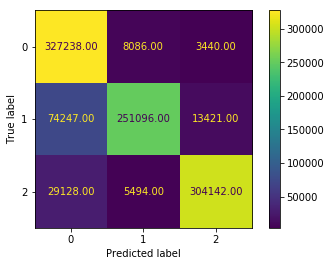

In [329]:
plot_confusion_matrix(model_18,X_train_sm, y_train_sm, values_format = '.2f')

In [392]:
test_model = RandomForestClassifier(n_estimators = 25,
                              max_depth = 20, 
                              min_samples_leaf = 1)

test_model.fit(X_train_sm,y_train_sm)


RandomForestClassifier(max_depth=20, n_estimators=25)

In [390]:
#test_df.info()

In [393]:
y_hat_test = test_model.predict(test_df)

In [396]:
#y_test

In [388]:
#pd.DataFrame(y_hat_test)

In [389]:
#test_df.info()

In [395]:
acct =accuracy_score(y_test,y_hat_test)
macro_precision_scoret=precision_score(y_test, y_hat_test, average='macro', )
micro_precision_scoret=precision_score(y_test, y_hat_test, average='micro')
macro_recall_scoret=recall_score(y_test, y_hat_test, average='macro')
micro_recall_scoret=recall_score(y_test, y_hat_test, average='micro')

print('Accuracy Score: {}'.format(acct))
print('Macro Precision Score: {}'.format(macro_precision_scoret))
print('Micro Precision Score: {}'.format(micro_precision_scoret))
print('Macro Recall Score: {}'.format(macro_recall_scoret))
print('Micro Recall Score: {}'.format(micro_recall_scoret))

cv_resultst = cross_validate(test_model, test_df, y_test, return_train_score=True)

print('Mean Test Score: {}'.format(cv_resultst['test_score'].mean()))
print('Mean Train Score: {}'.format(cv_resultst['train_score'].mean()))

Accuracy Score: 0.9068581494640671
Macro Precision Score: 0.7196097948232172
Micro Precision Score: 0.9068581494640671
Macro Recall Score: 0.7168217076081974
Micro Recall Score: 0.9068581494640671
Mean Test Score: 0.9014480637745201
Mean Train Score: 0.9255769862359298


# Trash Code Below

#### native bayes model

In [112]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(train_df, y_train)
y_hat = nb.predict(train_df)

In [113]:
from sklearn.model_selection import cross_validate
nb_cv_results = cross_validate(X=train_df, 
                y=y_train,
                estimator=nb, 
                cv=10,
                scoring=('precision_macro', 'precision_micro',),
                return_train_score=True )

In [114]:
nb_cv_results

{'fit_time': array([0.25615621, 0.24688911, 0.24469495, 0.24764681, 0.24737525,
        0.24546003, 0.24222898, 0.29899096, 0.25104094, 0.25374317]),
 'score_time': array([0.05883598, 0.04280496, 0.04417896, 0.04296398, 0.04378963,
        0.04446483, 0.04311395, 0.043643  , 0.04213619, 0.04498291]),
 'test_precision_macro': array([0.36058668, 0.35834074, 0.36071065, 0.35834793, 0.40874388,
        0.4104232 , 0.4062056 , 0.35858344, 0.44134151, 0.40162666]),
 'train_precision_macro': array([0.38357879, 0.39475022, 0.38718331, 0.38181616, 0.39074978,
        0.37926258, 0.39116713, 0.38924105, 0.40144545, 0.38705894]),
 'test_precision_micro': array([0.70176067, 0.6953039 , 0.7040563 , 0.69015995, 0.71518874,
        0.70612924, 0.71017274, 0.69745361, 0.69474088, 0.70615483]),
 'train_precision_micro': array([0.69842042, 0.69904685, 0.70336901, 0.69115322, 0.70878877,
        0.70652248, 0.71195362, 0.69639384, 0.69703648, 0.70943994])}

In [115]:
print(nb_cv_results['score_time'].mean())

0.045091438293457034


In [116]:
print(nb_cv_results['test_precision_macro'].mean())

0.3864910291987047


In [117]:
print(nb_cv_results['train_precision_macro'].mean())

0.3886253416401532


In [118]:
print(nb_cv_results['test_precision_micro'].mean())

0.7021120876246411


In [119]:
from sklearn.metrics import accuracy_score, precision_score

nb_precision_micro =precision_score(y_train, y_hat, average='micro')
nb_precision_macro =precision_score(y_train, y_hat, average='macro')
nb_precision = precision_score(y_train, y_hat, average='weighted')

nb_accuracy = accuracy_score(y_train, y_hat)

In [120]:
nb_precision_micro

0.7021939803097113

In [121]:
nb_precision_macro

0.38536377081949297

In [122]:
nb_precision

0.8037632944626701

In [123]:
nb_accuracy

0.7021939803097113

In [125]:
nb1 = MultinomialNB(alpha='Additive')
nb1.fit(train_df, y_train)
y_hat = nb1.predict(train_df)

TypeError: cannot perform reduce with flexible type

In [ ]:
nb_cv_results = cross_validate(X=train_df, 
                y=y_train,
                estimator=nb, 
                cv=10,
                scoring=('precision_macro', 'precision_micro',),
                return_train_score=True )

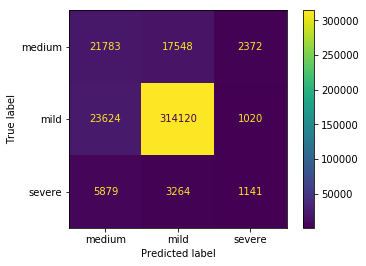

In [43]:
con_matrix = plot_confusion_matrix(nb, train_dummies_trans_df, y_train)

In [99]:
tree_clf = DecisionTreeClassifier(max_depth=3) 

tree_clf.fit(train_dummies_trans_df, y_train)

y_pred_dt = tree_clf.predict(train_dummies_trans_df)
y_pred_dt

array(['mild', 'mild', 'mild', ..., 'mild', 'mild', 'mild'], dtype=object)

In [100]:
acc = accuracy_score(y_train,y_pred_dt) * 100
print("Accuracy: {0}".format(acc))

Accuracy: 87.69267385112258


In [101]:
precision_score(y_train, y_pred_dt, average='macro')

0.767434272927646

In [102]:
precision_score(y_train, y_pred_dt, average='micro')

0.8769267385112258

In [103]:
precision_score(y_train, y_pred_dt, average='weighted')

0.8587181980356723

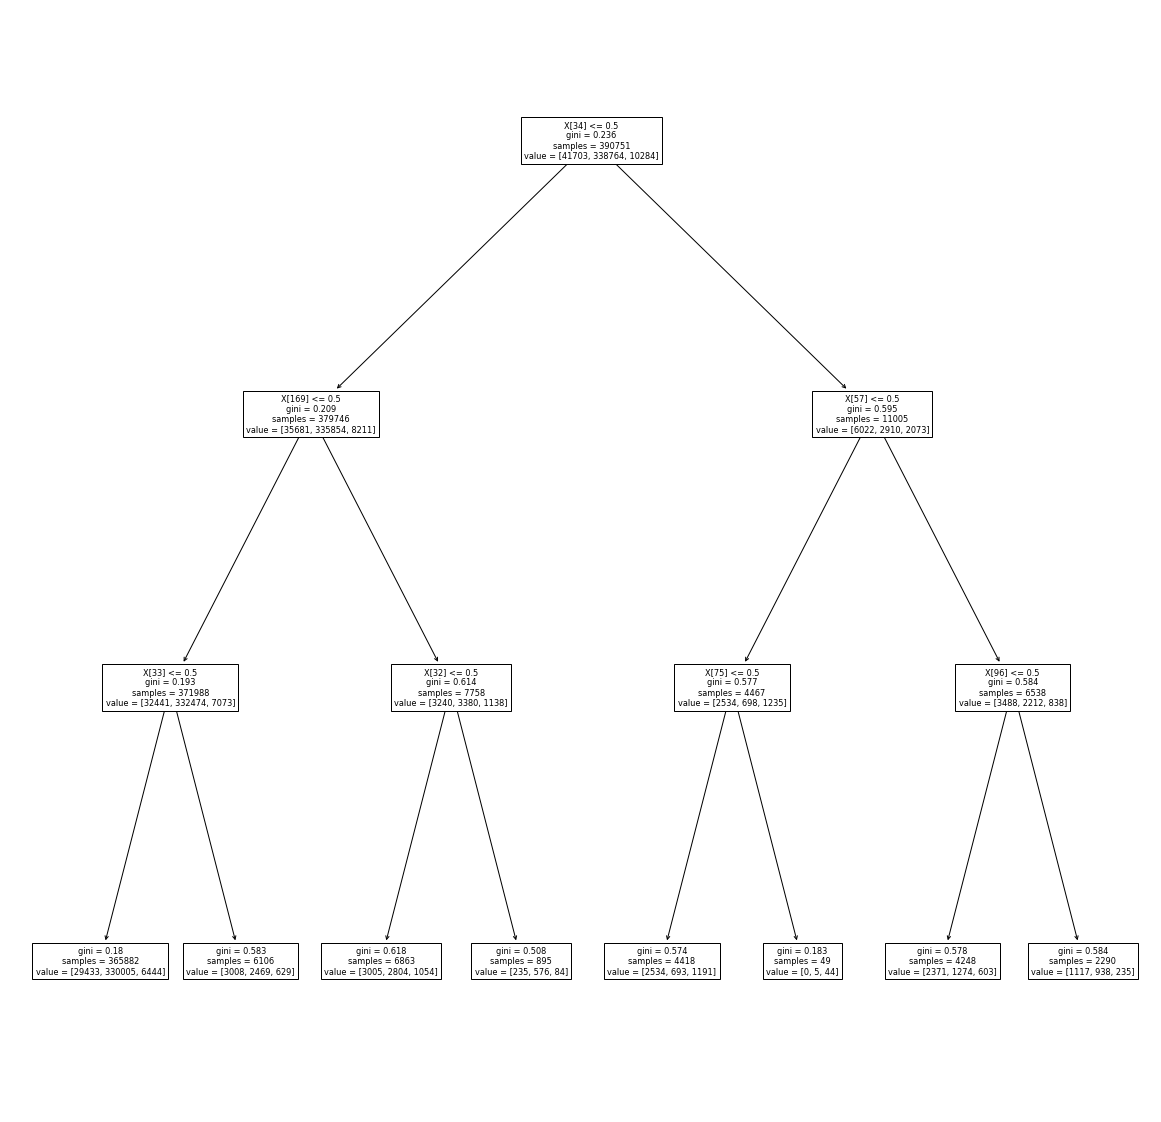

In [104]:
f,ax = plt.subplots(figsize=(20,20))
plot_tree(tree_clf, ax=ax);

In [70]:
df["CRASH_TYPE"].value_counts()

NO INJURY / DRIVE AWAY              379434
INJURY AND / OR TOW DUE TO CRASH    178782
Name: CRASH_TYPE, dtype: int64

In [64]:
train_dummies_trans_df.iloc[:,34]

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
390746    0.0
390747    0.0
390748    0.0
390749    0.0
390750    0.0
Name: FIRST_CRASH_TYPE_PEDESTRIAN, Length: 390751, dtype: float64

In [65]:
train_dummies_trans_df.iloc[:,57]

0         0.0
1         0.0
2         1.0
3         0.0
4         0.0
         ... 
390746    0.0
390747    0.0
390748    0.0
390749    0.0
390750    1.0
Name: CRASH_TYPE_INJURY AND / OR TOW DUE TO CRASH, Length: 390751, dtype: float64

In [67]:
train_dummies_trans_df.iloc[:,76]

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
390746    0.0
390747    0.0
390748    0.0
390749    0.0
390750    0.0
Name: PRIM_CONTRIBUTORY_CAUSE_EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST, Length: 390751, dtype: float64

In [68]:
train_dummies_trans_df.iloc[:,123]

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
390746    0.0
390747    0.0
390748    0.0
390749    0.0
390750    0.0
Name: SEC_CONTRIBUTORY_CAUSE_IMPROPER BACKING, Length: 390751, dtype: float64

In [69]:
train_dummies_trans_df.iloc[:,33]

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
390746    0.0
390747    0.0
390748    0.0
390749    0.0
390750    0.0
Name: FIRST_CRASH_TYPE_PEDALCYCLIST, Length: 390751, dtype: float64

In [105]:
pd.options.display.max_rows = 100000000

In [117]:
names = train_dummies_trans_df.columns.tolist()

In [113]:
train_dummies_trans_df.columns

Index(['DEVICE_CONDITION_FUNCTIONING IMPROPERLY',
       'DEVICE_CONDITION_FUNCTIONING PROPERLY', 'DEVICE_CONDITION_MISSING',
       'DEVICE_CONDITION_NO CONTROLS', 'DEVICE_CONDITION_NOT FUNCTIONING',
       'DEVICE_CONDITION_OTHER', 'DEVICE_CONDITION_UNKNOWN',
       'DEVICE_CONDITION_WORN REFLECTIVE MATERIAL',
       'WEATHER_CONDITION_BLOWING SNOW', 'WEATHER_CONDITION_CLEAR',
       ...
       'FIRST_CONTACT_POINT_OTHER', 'FIRST_CONTACT_POINT_REAR',
       'FIRST_CONTACT_POINT_REAR-LEFT', 'FIRST_CONTACT_POINT_REAR-RIGHT',
       'FIRST_CONTACT_POINT_ROOF', 'FIRST_CONTACT_POINT_SIDE-LEFT',
       'FIRST_CONTACT_POINT_SIDE-RIGHT',
       'FIRST_CONTACT_POINT_TOTAL (ALL AREAS)',
       'FIRST_CONTACT_POINT_UNDER CARRIAGE', 'FIRST_CONTACT_POINT_UNKNOWN'],
      dtype='object', length=284)

In [118]:
feature_used = ['DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT',  'DAMAGE',
        'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'PERSON_TYPE', 'SEX',
        'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED', 'EJECTION', 'VEHICLE_DEFECT',
        'VEHICLE_TYPE', 'VEHICLE_USE', 'MANEUVER', 'FIRST_CONTACT_POINT']

NameError: name 'name' is not defined

In [126]:
dt = DecisionTreeClassifier()
dt.fit(train_dummies_trans_df, y_train)

for fi, feature in zip(dt.feature_importances_, names):
    (fi, feature)

0.002309293373990224 DEVICE_CONDITION_FUNCTIONING IMPROPERLY
0.015298644235235446 DEVICE_CONDITION_FUNCTIONING PROPERLY
0.00010873978151615678 DEVICE_CONDITION_MISSING
0.012014444322861454 DEVICE_CONDITION_NO CONTROLS
0.0011320932449798472 DEVICE_CONDITION_NOT FUNCTIONING
0.002315906456485124 DEVICE_CONDITION_OTHER
0.005081025643936986 DEVICE_CONDITION_UNKNOWN
8.999209112701198e-05 DEVICE_CONDITION_WORN REFLECTIVE MATERIAL
0.0001835612633912607 WEATHER_CONDITION_BLOWING SNOW
0.009625478783102845 WEATHER_CONDITION_CLEAR
0.006989212222871771 WEATHER_CONDITION_CLOUDY/OVERCAST
0.0005433590886575268 WEATHER_CONDITION_FOG/SMOKE/HAZE
0.0007554984796381747 WEATHER_CONDITION_FREEZING RAIN/DRIZZLE
0.0010152350307889477 WEATHER_CONDITION_OTHER
0.008653293996078849 WEATHER_CONDITION_RAIN
4.8841296488636175e-05 WEATHER_CONDITION_SEVERE CROSS WIND GATE
0.00037720312179559466 WEATHER_CONDITION_SLEET/HAIL
0.003820399599060665 WEATHER_CONDITION_SNOW
0.0021055126056011633 WEATHER_CONDITION_UNKNOWN
0.007

In [127]:
(fi, feature)

(0.005571701442926906, 'FIRST_CONTACT_POINT_UNKNOWN')

In [123]:
pd.Series(fofi)

0    0.005512
dtype: float64

In [ ]:
import pandas as pd 
import numpy as np 
import csv  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ls

In [ ]:
people_data = pd.read_csv('data/Traffic_Crashes_-_People.csv')
crashes_data = pd.read_csv('data/Traffic_Crashes_-_Crashes.csv')
vehicles_data = pd.read_csv('data/Traffic_Crashes_-_Vehicles.csv')

In [ ]:
#X['df_crash'] = X['df_crash'].map({'male': 0, 'female': 1})

In [ ]:
print(crashes_data.info())

In [ ]:
print(crashes_data.info())

## Dropping columns

Crash Dataset

In [ ]:
crashes_data.drop(crashes_data.columns[np.r_[1,2,5,10:13,15,17:20,21,24:35,36:43,48]], axis=1, inplace=True)
crashes_data.info()

People Dataset

In [ ]:
people_data.drop(people_data.columns[np.r_[3:10,11,12,13,17:30]], axis=1, inplace=True)
people_data.info()

In [ ]:
vehicles_data.drop(vehicles_data.columns[np.r_[0,2:13,16,18:38,39:72]], axis=1, inplace=True)
vehicles_data.info()

Merging Data

In [ ]:
people_crashes_data = crashes_data.merge(people_data, on='CRASH_RECORD_ID')
df = people_crashes_data.merge(vehicles_data, on='CRASH_RECORD_ID')
df.info()

## Creating our target

In [ ]:
df['MOST_SEVERE_INJURY'] = df['MOST_SEVERE_INJURY'].map({'NO INDICATION OF INJURY': 'low risk', 
                                                                         'REPORTED, NOT EVIDENT': 'low risk',
                                                                         'NONINCAPACITATING INJURY': 'medium risk',
                                                                         'INCAPACITATING INJURY': 'high risk',
                                                                         'FATAL': 'high risk'})
df['MOST_SEVERE_INJURY']

In [ ]:
df.duplicated().sum()

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df['LATITUDE'].fillna(df['LATITUDE'].mean(), inplace=True )
df['LONGITUDE'].fillna(df['LONGITUDE'].mean(), inplace=True )

In [ ]:
df.dropna(subset=['MOST_SEVERE_INJURY'], inplace=True)

In [ ]:
df['SAFETY_EQUIPMENT'].value_counts()

In [ ]:
df['SEX'].fillna('X', inplace=True)

df['SEX'] = df['SEX'].map({'M': 'M', 
                           'F': 'F',
                           'X': 'Unknown'})
df['SEX'].value_counts()

In [ ]:
df['SAFETY_EQUIPMENT'].fillna('USAGE UNKNOWN', inplace=True)
df['AIRBAG_DEPLOYED'].fillna('DEPLOYMENT UNKNOWN', inplace=True)
df['EJECTION'].fillna('UNKNOWN', inplace=True)
df['VEHICLE_DEFECT'].fillna('UNKNOWN', inplace=True)
df['VEHICLE_TYPE'].fillna('UNKNOWN/NA', inplace=True)
df['VEHICLE_USE'].fillna('UNKNOWN/NA', inplace=True)
df['MANEUVER'].fillna('UNKNOWN/NA', inplace=True)
df['FIRST_CONTACT_POINT'].fillna('UNKNOWN', inplace=True)

In [ ]:
df.isnull().sum()


In [ ]:
discrete_features = df.loc[:,['MOST_SEVERE_INJURY','SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED', 'EJECTION', 'VEHICLE_DEFECT',
       'VEHICLE_TYPE', 'VEHICLE_USE', 'MANEUVER', 'FIRST_CONTACT_POINT']]

In [ ]:
df.info()

In [ ]:
#df[df['CRASH_DATE']].to_datetime()

In [ ]:
#df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'])

#my diferent way


#df['year'] = df['CRASH_DATE'].apply(lambda date: date.year)

In [ ]:
###


#df = df.loc[(df.CRASH_DATE >= '09-01-2017') & (df.CRASH_DATE <= '09-01-2019')]

In [ ]:
#df.shape

In [ ]:
#df.CRASH_DATE.between('201-12-28', '2017-1-29')

In [ ]:
#df['CRASH_DATE']= between(df['CRASH_DATE'] >= '09-01-2016' & df['CRASH_DATE'] <= '09-01-2019')

In [ ]:
import datetime as datetime
df['CRASH_DATE'] = df['CRASH_DATE'].map(lambda x: datetime.datetime.strptime(x[0:10], "%m/%d/%Y"))

In [ ]:
#df["CRASH_DATE"] = df[df['CRASH_DATE'] >= '09-01-2016'] and df[df['CRASH_DATE'] <= '09-01-2016']

In [ ]:
df = df[df["CRASH_DATE"].isin(pd.date_range("2019-08-01", "2020-08-01"))]

In [ ]:
df['CRASH_DATE'].shape

In [ ]:
df.info()

In [ ]:
df.to_csv('new_data.csv', index=False)

In [ ]:
ls

In [ ]:
df = pd.read_csv('new_data.csv')

In [ ]:
df

In [ ]:
df.info()

## Creating Models

### Creating FSM

In [ ]:
X = df.drop(["MOST_SEVERE_INJURY","CRASH_RECORD_ID"], axis=1)
y = df['MOST_SEVERE_INJURY']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .3, random_state = 42)

In [ ]:
y_train.value_counts()

In [ ]:
X_train_baseline = X_train.select_dtypes(include=['int64','float64'])
X_test_baseline = X_test.select_dtypes(include=['int64','float64'])

model = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=10000000,)
model.fit(X_train_baseline,y_train)
y_hat = model.predict(X_train_baseline)

from sklearn.metrics import balanced_accuracy_score, f1_score

acc = balanced_accuracy_score(y_train,y_hat)
f1_score = f1_score(y_train,y_hat, average='macro')

In [ ]:
acc

In [ ]:
f1_score

In [ ]:
cate = df.select_dtypes('object')

In [ ]:
cate.columns

In [ ]:
categoricals = ['DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE', 'DAMAGE',
        'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'PERSON_TYPE', 'SEX',
        'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED', 'EJECTION', 'VEHICLE_DEFECT',
        'VEHICLE_TYPE', 'VEHICLE_USE', 'MANEUVER', 'FIRST_CONTACT_POINT']

train_dummies = X_train[categoricals]
#test_dummies = X_test[categoricals]

# Create OneHotEncoder object to create dummies
ohe = OneHotEncoder(handle_unknown='ignore')

# Transform the dataset into dummies matrix
enc = ohe.fit(train_dummies)

train_dummies_trans = enc.transform(train_dummies)
#test_dummies_trans = enc.transform(test_dummies)

# Dummies values in matrix form
train_data = train_dummies_trans.todense()
#test_data = test_dummies_trans.todense()

# New dummy column names
names = ohe.get_feature_names(categoricals)

# Make them into Dataframe
train_dummies_trans_df = pd.DataFrame(train_data, columns=names)
#test_dummies_trans_df = pd.DataFrame(test_data, columns=names)

In [ ]:
train_dummies_trans_df

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
nb = MultinomialNB()

In [ ]:
nb.fit(train_dummies_trans_df, y_train)

In [ ]:
y_hat = nb.predict(train_dummies_trans_df)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score

nb_pre_micro =precision_score(y_train, y_hat, average='micro')
nb_pre_macro =precision_score(y_train, y_hat, average='macro')
nb_pre = precision_score(y_train, y_hat, average='weighted')

nb_acc = accuracy_score(y_train, y_hat)

In [ ]:
nb_pre_micro

In [ ]:
nb_pre_macro

In [ ]:
nb_pre

In [ ]:
nb_acc

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid = {
    'n_neighbors': [1, 3, 5],
    'metric': ['minkowski', 'manhattan'],
    'weights': ['uniform', 'distance']
}

In [ ]:
train_dummies_trans_df.iloc[:,27]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(train_dummies_trans_df, y_train)

In [ ]:
#y_hat = knn.predict(train_dummies_trans_df)

##  ** trash code below **

In [ ]:
X_train = X_train.drop(columns=['CRASH_DATE', 'PERSON_ID'])

In [ ]:
#X_train.columns

In [ ]:
#train_1 = X_train.drop(columns=['CRASH_DATE', 'PERSON_ID'])

In [ ]:
cate.columns

In [ ]:
cate_cat = ['DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE', 'DAMAGE',
        'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'PERSON_TYPE', 'SEX',
        'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED', 'EJECTION', 'VEHICLE_DEFECT',
        'VEHICLE_TYPE', 'VEHICLE_USE', 'MANEUVER', 'FIRST_CONTACT_POINT']

In [ ]:
train_dummies = X_train[cate_cat]

In [ ]:
enc = OneHotEncoder(categories='auto', handle_unknown='ignore')

In [ ]:
categories = X_train.select_dtypes(include='object')

In [ ]:
enc.fit(train_dummies)

In [ ]:
trans_dum = enc.transform(train_dummies)


In [ ]:
train_data = trans_dum.todense()

In [ ]:
name = enc.get_feature_names(cate_cat)

In [ ]:
train_dummies_trans_df = pd.DataFrame(train_data, columns=name)

In [ ]:
train_dummies_trans_df

In [ ]:
trans_df

In [ ]:
train_dummies_trans_df = pd.DataFrame(train_dum, columns=names)

In [ ]:
#name = enc.get_feature_names(train_dum)

In [ ]:
#pd.get_dummies(categories, sparse= True)

In [ ]:
df.info()

In [ ]:
X_train['WEATHER_CONDITION'].value_counts()

In [ ]:
categorial= df.select_dtypes(include='object')

In [ ]:
#pd.get_dummies(categorial[categorial['DEVICE_CONDITION','WEATHER_CONDITION']], prefix=str).head()

In [ ]:
#pd.Series([categorial]).str.get_dummies()

In [ ]:
categorial.info()

In [ ]:
new_cat = categorial.drop(columns=['CRASH_RECORD_ID', 'CRASH_DATE', 'PERSON_ID'])

In [ ]:
pd.get_dummies(categorial.to_sparse()).head()

In [ ]:
pd.get_dummies(categorial['DEVICE_CONDITION'])
pd.get_dummies(categorial['WEATHER_CONDITION'])
pd.get_dummies(categorial['LIGHTING_CONDITION'])
pd.get_dummies(categorial['FIRST_CRASH_TYPE'])
pd.get_dummies(categorial['ROADWAY_SURFACE_COND']).head()
pd.get_dummies(categorial['ROAD_DEFECT']).head()
pd.get_dummies(categorial['CRASH_TYPE']).head()
pd.get_dummies(categorial['DAMAGE']).head()
pd.get_dummies(categorial['PRIM_CONTRIBUTORY_CAUSE']).head()
pd.get_dummies(categorial['SEC_CONTRIBUTORY_CAUSE']).head()
pd.get_dummies(categorial['PERSON_TYPE']).head()
pd.get_dummies(categorial['SEX']).head()
pd.get_dummies(categorial['SAFETY_EQUIPMENT']).head()
pd.get_dummies(categorial['AIRBAG_DEPLOYED']).head()
pd.get_dummies(categorial['EJECTION']).head()
pd.get_dummies(categorial['VEHICLE_DEFECT']).head()
pd.get_dummies(categorial['VEHICLE_TYPE']).head() #this has 22 columns
pd.get_dummies(categorial['VEHICLE_USE']).head() # 25 columns
pd.get_dummies(categorial['MANEUVER']).head() # 28 columns
pd.get_dummies(categorial['FIRST_CONTACT_POINT']).head() # 40 columns

In [ ]:
pd.get_dummies(categorial['FIRST_CONTACT_POINT']).head()

In [ ]:
categorial.shape

In [ ]:
pd.get_dummies(new_cat, sparse=True) #long to run

In [ ]:
train_new_cat = categories.drop(columns=['CRASH_DATE', 'PERSON_ID'])

In [ ]:
pd.get_dummies(train_new_cat)

In [ ]:
X_train.columns

In [ ]:
X_train.drop(columns=['CRASH_DATE','PERSON_ID'], inplace=True)

In [ ]:
X_train.columns

In [ ]:
categorical_feature_names= ['POSTED_SPEED_LIMIT', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'CRASH_TYPE', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK',
       'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 'PERSON_TYPE', 'SEX',
       'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED', 'EJECTION', 'VEHICLE_DEFECT',
       'VEHICLE_TYPE', 'VEHICLE_USE', 'MANEUVER', 'FIRST_CONTACT_POINT']

In [ ]:
def encode_and_concat_feature_train(X_train, feature_name):
    """
    Helper function for transforming training data.  It takes in the full X dataframe and
    feature name, makes a one-hot encoder, and returns the encoder as well as the dataframe
    with that feature transformed into multiple columns of 1s and 0s
    """
    # make a one-hot encoder and fit it to the training data
    ohe = OneHotEncoder(categories="auto", handle_unknown="ignore")
    single_feature_df = X_train[[feature_name]]
    ohe.fit(single_feature_df)
    
    # call helper function that actually encodes the feature and concats it
    X_train = encode_and_concat_feature(X_train, feature_name, ohe)
    
    return ohe, X_train

In [ ]:
def encode_and_concat_feature(X, feature_name, ohe):
    """
    Helper function for transforming a feature into multiple columns of 1s and 0s. Used
    in both training and testing steps.  Takes in the full X dataframe, feature name, 
    and encoder, and returns the dataframe with that feature transformed into multiple
    columns of 1s and 0s
    """
    # create new one-hot encoded df based on the feature
    single_feature_df = X[[feature_name]]
    feature_array = ohe.transform(single_feature_df).toarray()
    ohe_df = pd.DataFrame(feature_array, columns=ohe.categories_[0], index=X.index)
    
    # drop the old feature from X and concat the new one-hot encoded df
    X = X.drop(feature_name, axis=1)
    X = pd.concat([X, ohe_df], axis=1)
    
    return X

In [ ]:
X_train

In [ ]:
X_train_categorical = X_train[categorical_feature_names]

In [ ]:
X_train_categorical

In [ ]:
encoders = {}

for categorical_feature in categorical_feature_names:
    ohe, X_train = encode_and_concat_feature_train(X_train, categorical_feature)
    encoders[categorical_feature] = ohe